<a href="https://colab.research.google.com/github/suneelcs1615/DeepLearning/blob/main/Unit-02_Deep%20Neural%20Networks/Deep_Neural_Network_Training_Using_TensorFlow_with_Regularization%2C_Dropout%2C_Weight_Initialization%2C_and_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Neural Network Training Using TensorFlow with Regularization, Dropout, Weight Initialization, and Optimization
This notebook is an Open Educational Resource (OER) developed for teaching and learning purposes. It is released under the Creative Commons Attribution–ShareAlike (CC BY-SA 4.0) International License.

This license allows anyone to use, copy, adapt, modify, translate, remix, and redistribute the material in any medium or format, provided proper credit is given to the original author and any modified versions are shared under the same license.

---
*Citation Format: Suneel Kumar Duvvuri, Deep Neural Network Training Using TensorFlow with Regularization, Dropout, Weight Initialization, and Optimization. Open Educational Resource (OER). Licensed under CC BY-SA 4.0*

# Aim

To design and train a deep neural network using TensorFlow on an existing dataset and study the effects of weight initialization, regularization, dropout, and optimization techniques.

# Dataset Used

MNIST Handwritten Digits Dataset

*   60,000 training images

*   10,000 testing images
* 28 × 28 grayscale images

* 10 output classes (digits 0–9)

### Step 1: Import Required Libraries
The first step involved importing the necessary libraries: `tensorflow` for building and training the neural network, `numpy` for numerical operations, and `matplotlib.pyplot` for plotting. This sets up the environment for our deep learning task.

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load and Preprocess the MNIST Dataset
We loaded the MNIST handwritten digits dataset, which consists of 60,000 training images and 10,000 testing images. Each image is 28x28 grayscale.

The preprocessing steps included:
*   **Normalizing the pixel values:** Dividing by 255.0 to scale them between 0 and 1.
*   **Flattening the images:** Reshaping each 28x28 image into a 1D array of 784 pixels to be used as input for a dense neural network.

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)


### Step 3: Build Deep Neural Network Model
A sequential deep neural network model was constructed using Keras. Key features of the model include:
*   **Dense layers:** Two hidden layers with 256 and 128 units, respectively, using the 'relu' activation function.
*   **He Normal Initialization:** `kernel_initializer=initializers.HeNormal()` was used to initialize the weights, which is suitable for ReLU activations.
*   **L2 Regularization:** `kernel_regularizer=regularizers.l2(0.001)` was applied to both hidden layers to prevent overfitting by penalizing large weights.
*   **Dropout Layers:** `layers.Dropout(0.3)` was added after each hidden layer to randomly set a fraction of input units to 0 at each update during training, further reducing overfitting.
*   **Output layer:** A dense layer with 10 units (for the 10 digits) and 'softmax' activation for multi-class classification.

In [10]:
from tensorflow.keras import layers, regularizers, initializers

model = tf.keras.Sequential([
    layers.Dense(256, activation='relu',
                 kernel_initializer=initializers.HeNormal(),
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu',
                 kernel_initializer=initializers.HeNormal(),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile the Model
The model was compiled with the following configurations:
*   **Optimizer:** Adam optimizer with a learning rate of 0.001, a popular choice for its efficiency and good performance.
*   **Loss Function:** 'sparse_categorical_crossentropy' was chosen, which is suitable for multi-class classification problems with integer labels.
*   **Metrics:** 'accuracy' was set as the metric to monitor during training and evaluation.

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Train the Model
The model was trained using the `fit` method with the following parameters:
*   **Epochs:** 15 iterations over the entire training dataset.
*   **Batch Size:** 128 samples per gradient update.
*   **Validation Split:** 20% of the training data was reserved for validation to monitor the model's performance on unseen data during training.

In [12]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7642 - loss: 1.2955 - val_accuracy: 0.9507 - val_loss: 0.4961
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9392 - loss: 0.5068 - val_accuracy: 0.9620 - val_loss: 0.3516
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9492 - loss: 0.3744 - val_accuracy: 0.9638 - val_loss: 0.2885
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9550 - loss: 0.3129 - val_accuracy: 0.9699 - val_loss: 0.2497
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9603 - loss: 0.2785 - val_accuracy: 0.9682 - val_loss: 0.2384
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9617 - loss: 0.2585 - val_accuracy: 0.9710 - val_loss: 0.2209
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9631 - loss: 0.2443 - val_accuracy: 0.9703 - val_loss: 0.2170
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9631 - loss: 0.2408 - val_accu

### Step 6: Evaluate Model Performance
After training, the model's performance was evaluated on the test dataset (`x_test`, `y_test`) to assess its generalization capability. The `evaluate` method returned the test loss and test accuracy.

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9704 - loss: 0.2029
Test Accuracy: 0.9757000207901001


### Step 7: Plot Training and Validation Accuracy
Finally, the training and validation accuracy over epochs were plotted using `matplotlib` to visualize the model's learning progress and identify potential overfitting or underfitting.

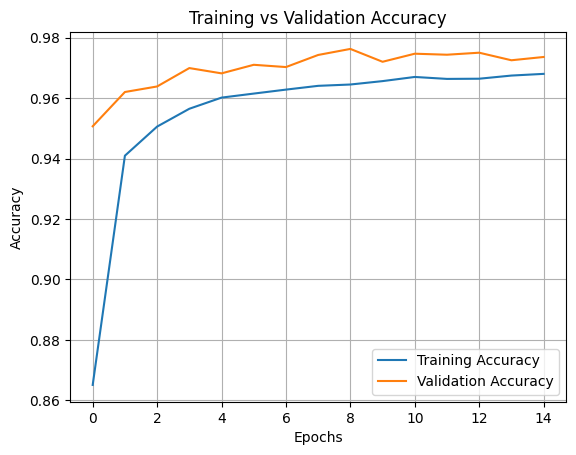

In [14]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()